# Movie Data Analysis for Microsoft Recommendations

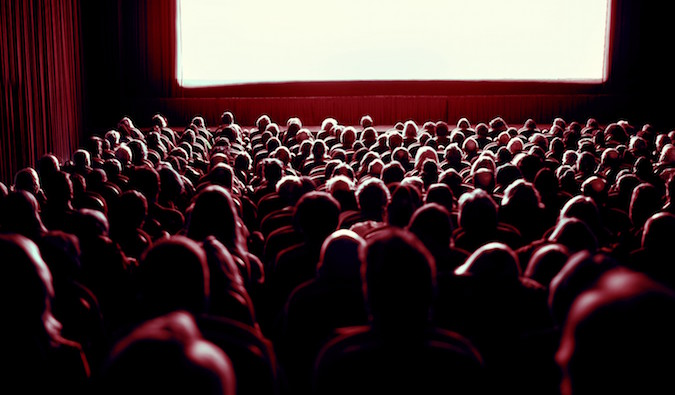

## Overview

This project explores different types of films in order to identify actionable recommendations for Microsoft's new movie studio. Descriptive analysis of which films perform the best at the box office shows that film ratings can vary depending on the genre and runtime. In addition, some genres tend to have a greater return on investment when compared to others. Microsoft can use this analysis to aid their decision in prioritizing what types of films to produce.

## Business Problem

Like other companies creating original video content, Microsoft may be able to appropriately allocate their resources and produce movies that will perform well based on specific success metrics. By doing so, Microsoft can make decisions on what types of movies to create as the new movie studio grows. By using datasets from some of the most popular film review websites, such as IMDb, I describe the relationship between genres, ratings, and gross to anticipate what films will be successful.

## Data Understanding

IMDb and The Numbers are popular movie review sites that have a plethora of datasets on not only ratings, but gross and other information related to the movie. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
imdb_basics = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
imdb_ratings = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

### IMDb Genres and Ratings Data

The IMDb basics dataset includes movie titles from 2010 to projected titles up until 2115, with additional information in runtime and genres. The IMDb ratings dataset includes average rating and number of votes for each movie.

In [3]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [4]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [5]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [6]:
imdb_ratings.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


### The Numbers Data

The Numbers dataset includes movie characteristics such as release date, production budget, domestic and worldwide gross.

In [7]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


## Data Preparation

### Preliminary Data Cleaning

For the two IMDb datasets, I start by checking for any null values and then find the unique genres in the basics dataset. I break out the genres listed in the genre column by creating a list of all the unique genres and populating this list into the dataframe.

In [9]:
#checking for null values in basics
imdb_basics['genres'].isna().sum()

5408

In [10]:
#replacing null values in genres with string, helpful code from Lindsey
imdb_basics['genres'] = imdb_basics['genres'].fillna('Unknown')

In [11]:
#creating a unique genres list to break out genres from the column in df
unique_genres_list = []
for genre_details in imdb_basics['genres']:
    genres_list = genre_details.split(',')
    for genre in genres_list:
        unique_genres_list.append(genre)
        
unique_genres_list = sorted(list(set(unique_genres_list)))
unique_genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [12]:
#adding the list of unique genres to the dataframe
for genre in unique_genres_list:
    imdb_basics[genre] = 0

In [13]:
#now populating each unique genre column when it appears in the genres column
for index, genre_details in enumerate(imdb_basics['genres']):
    for genre in unique_genres_list:
        if genre in genre_details:
            imdb_basics.at[index, genre] = 1

In [14]:
imdb_basics.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#checking for null values in ratings
imdb_ratings['averagerating'].isna().sum()

0

For the budgets dataset, I change the datatype of some columns to make them easier to work with. I also drop older movies from the dataset, since there is quite the range and gross can vary depending on how old a movie is. Lastly, I add a return on investment column to the budgets dataset.

In [16]:
#https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
budgets['production_budget'] = budgets['production_budget'].replace('[\$\,\.]',"",regex=True).astype(int)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$\,\.]',"",regex=True).astype(int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$\,\.]',"",regex=True).astype(int)

In [17]:
#changing release_date to datetime object
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [18]:
budgets['release_date'].describe()

<ipython-input-18-c885afbf996d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  budgets['release_date'].describe()


count                    5782
unique                   2418
top       2014-12-31 00:00:00
freq                       24
first     1915-02-08 00:00:00
last      2020-12-31 00:00:00
Name: release_date, dtype: object

In [19]:
#there are some old movies...will only look at the last 10 years
budgets = budgets.loc[(budgets['release_date'] >= '2010-01-01')
                       & (budgets['release_date'] < '2020-01-01')]

In [20]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 1 to 5780
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2191 non-null   int64         
 1   release_date       2191 non-null   datetime64[ns]
 2   movie              2191 non-null   object        
 3   production_budget  2191 non-null   int64         
 4   domestic_gross     2191 non-null   int64         
 5   worldwide_gross    2191 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 119.8+ KB


In [21]:
#adding return on investment column
budgets['roi'] = ((budgets['domestic_gross']-budgets['production_budget'])
                  / budgets['production_budget']) * 100

In [22]:
budgets.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,roi
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-41.289850
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-87.782186
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,38.840250


### Merging Datasets

In order to analyze genres and runtime with ratings, I have to merge the two IMDb datasets. For both, there is a primary key 'tconst'. This will allow for a simple merge on this column. 
I then do another merge between the IMDb basics dataset and the budgets dataset to examine return on investment by genres. Since these two dataframes do not share a unique column, I create a new column in each dataframe with the movie title and year in order to merge the two.

In [23]:
#merging IMDb basics and ratings dataframes
imdb_df = pd.merge(imdb_basics, imdb_ratings, on="tconst")

In [24]:
imdb_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,0,0,0,0,0,0,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",0,0,0,0,...,0,0,0,0,0,0,0,0,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,6.9,4517


In [25]:
#grabbing the IMDb basics dataframe for genre information
genres_df = imdb_basics.copy(deep=True)

In [26]:
#drop columns I don't need, and then create a unique column for the merge with movie title and year
genres_df.drop(['tconst', 'original_title', 'runtime_minutes'], 
               axis='columns', inplace=True)

In [27]:
#I start by changing year to a string in order to concatenate title and year
genres_df['start_year'] = genres_df['start_year'].apply(str)

In [28]:
genres_df['title_year'] = genres_df['primary_title'].str.cat(genres_df['start_year'], sep=" ")

In [29]:
#additional columns I don't need
genres_df.drop(['primary_title', 'start_year'], 
               axis='columns', inplace=True)

In [30]:
genres_df.head(3)

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western,title_year
0,"Action,Crime,Drama",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,Sunghursh 2013
1,"Biography,Drama",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,One Day Before the Rainy Season 2019
2,Drama,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,The Other Side of the Wind 2018


In [31]:
#I repeat similar steps on the budgets dataframe as above
#https://www.dataquest.io/blog/python-datetime-tutorial/
budgets['release_date'] = budgets['release_date'].dt.strftime('%Y')

In [32]:
budgets['title_year'] = budgets['movie'].str.cat(budgets['release_date'], sep=" ")

In [33]:
budgets.drop(['id', 'worldwide_gross', 'release_date', 'movie'], 
             axis='columns', inplace=True)

In [34]:
budgets.head(3)

,production_budget,domestic_gross,roi,title_year
1,410600000,241063875,-41.289850,Pirates of the Caribbean: On Stranger Tides 2011
2,350000000,42762350,-87.782186,Dark Phoenix 2019
3,330600000,459005868,38.840250,Avengers: Age of Ultron 2015


In [35]:
#now I merge the two on the new unique column
invested_genres = pd.merge(budgets, genres_df, 
                           on='title_year', how='left')

In [36]:
invested_genres.head(3)

,production_budget,domestic_gross,roi,title_year,genres,Action,Adult,Adventure,Animation,Biography,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unknown,War,Western
0,410600000,241063875,-41.289850,Pirates of the Caribbean: On Stranger Tides 2011,"Action,Adventure,Fantasy",1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,350000000,42762350,-87.782186,Dark Phoenix 2019,"Action,Adventure,Sci-Fi",1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,330600000,459005868,38.840250,Avengers: Age of Ultron 2015,"Action,Adventure,Sci-Fi",1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysis

### Average Rating Per Genre

News, Documentaries, and Biography genres have higher rated movies. Although, one thing to keep in mind is that these genres don't have as many movies as other genres such as Comedy, Drama, and Thriller.

In [37]:
#exploring the average rating per genre first, helpful code from Lindsey 
#number of votes dictates the average rating for a movie, this may skew overall understanding of mean
for genre in unique_genres_list:
    genre_ratings = imdb_df.loc[imdb_df[genre] == 1]['averagerating'].mean()
    print(f"{genre}: {genre_ratings: .1f} average rating")

Action:  5.8 average rating
Adult:  3.8 average rating
Adventure:  6.2 average rating
Animation:  6.2 average rating
Biography:  7.2 average rating
Comedy:  6.0 average rating
Crime:  6.1 average rating
Documentary:  7.3 average rating
Drama:  6.4 average rating
Family:  6.4 average rating
Fantasy:  5.9 average rating
Game-Show:  7.3 average rating
History:  7.0 average rating
Horror:  5.0 average rating
Music:  6.9 average rating
Musical:  6.5 average rating
Mystery:  5.9 average rating
News:  7.3 average rating
Reality-TV:  6.5 average rating
Romance:  6.1 average rating
Sci-Fi:  5.5 average rating
Short:  8.8 average rating
Sport:  7.0 average rating
Talk-Show:  nan average rating
Thriller:  5.6 average rating
Unknown:  6.5 average rating
War:  6.6 average rating
Western:  5.9 average rating


In [38]:
#examining number of votes, since this can affect average rating
imdb_df['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [39]:
#will only take movies with at least 50 number of votes
imdb_voted = imdb_df[imdb_df['numvotes'] >= 50]

In [40]:
#creating a new dictionary
imdb_details = {}

for genre in unique_genres_list:
    genre_df = imdb_voted.loc[imdb_voted[genre] == 1]
    total_movies = imdb_voted[genre].sum()
    avg_rating = genre_df['averagerating'].mean()
    imdb_details[genre] = {'total_movies': total_movies, 
                           'avg_rating': avg_rating}
    
imdb_details

{'Action': {'total_movies': 4586, 'avg_rating': 5.581639773222853},
 'Adult': {'total_movies': 1, 'avg_rating': 2.0},
 'Adventure': {'total_movies': 2329, 'avg_rating': 5.836753971661657},
 'Animation': {'total_movies': 1063, 'avg_rating': 6.309595484477893},
 'Biography': {'total_movies': 1782, 'avg_rating': 6.933221099887766},
 'Comedy': {'total_movies': 10495, 'avg_rating': 5.746450690805145},
 'Crime': {'total_movies': 3077, 'avg_rating': 5.928501787455313},
 'Documentary': {'total_movies': 5256, 'avg_rating': 7.152035768645358},
 'Drama': {'total_movies': 17233, 'avg_rating': 6.201067718911391},
 'Family': {'total_movies': 1743, 'avg_rating': 6.04968445209409},
 'Fantasy': {'total_movies': 1259, 'avg_rating': 5.632883240667196},
 'Game-Show': {'total_movies': 1, 'avg_rating': 5.6},
 'History': {'total_movies': 1269, 'avg_rating': 6.744208037825059},
 'Horror': {'total_movies': 4440, 'avg_rating': 4.728783783783784},
 'Music': {'total_movies': 1219, 'avg_rating': 6.670385561936014}

In [41]:
#now making my dictionary into a dataframe
pop_genres_df = pd.DataFrame(imdb_details).T

In [42]:
pop_genres_df

,total_movies,avg_rating
Action,4586.0,5.581640
Adult,1.0,2.000000
Adventure,2329.0,5.836754
Animation,1063.0,6.309595
Biography,1782.0,6.933221
Comedy,10495.0,5.746451
Crime,3077.0,5.928502
Documentary,5256.0,7.152036
Drama,17233.0,6.201068
Family,1743.0,6.049684


In [43]:
#some genres have very few movies, I drop those genres with helpful code from Lindsey
drop_genre = [genre for genre in pop_genres_df.index if pop_genres_df['total_movies'][genre] <= 5]

In [44]:
drop_genre

['Adult', 'Game-Show', 'Reality-TV', 'Short', 'Talk-Show']

In [45]:
pop_genres_df = pop_genres_df.drop(index = drop_genre)

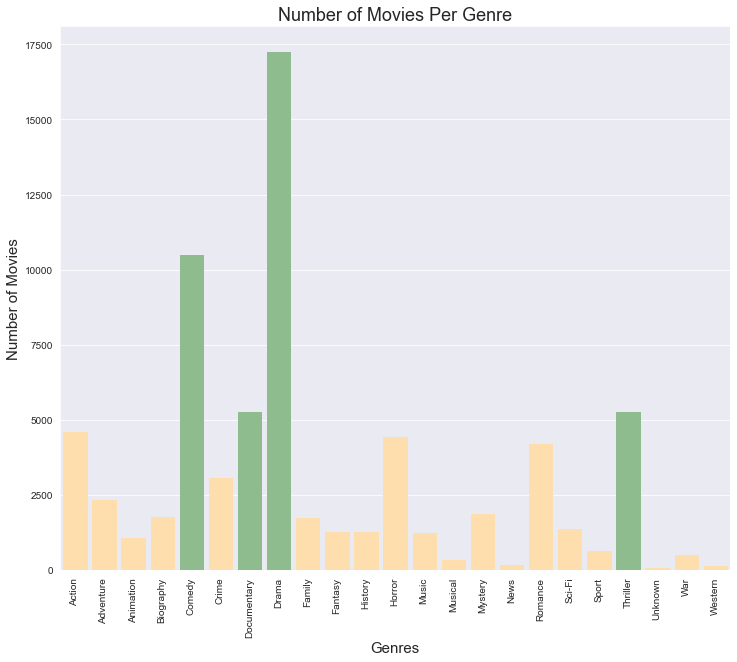

In [46]:
#https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
#https://stackoverflow.com/questions/31074758/how-to-set-a-different-color-to-the-largest-bar-in-a-seaborn-barplot

plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')


plot = sns.barplot(x=pop_genres_df.index, y='total_movies', data=pop_genres_df)

for bar in plot.patches:
    if bar.get_height() > 5000:
        bar.set_color('darkseagreen')
    else:
        bar.set_color('navajowhite')

plt.setp(plot.get_xticklabels(), rotation=90)

plt.xlabel('Genres', size=15)
plt.ylabel('Number of Movies', size=15)
plt.title('Number of Movies Per Genre', size=18)
plt.show()

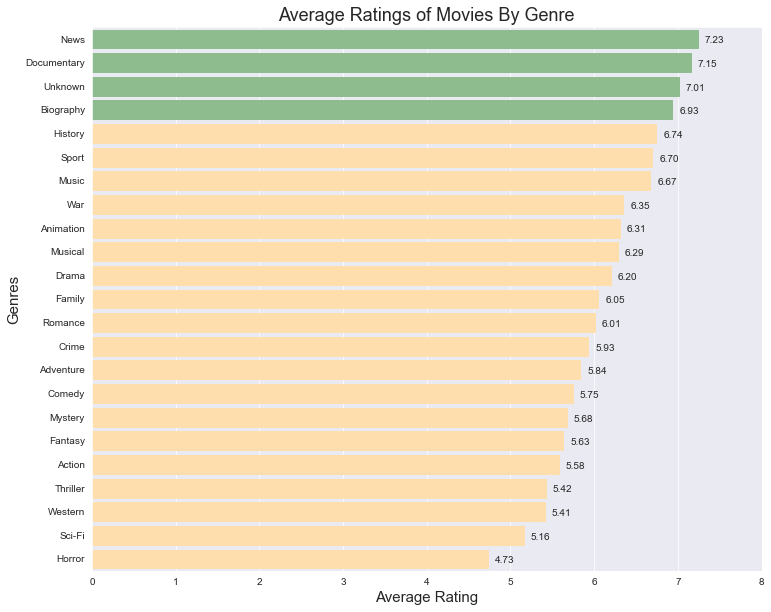

In [47]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')

#code from https://stackoverflow.com/questions/42861049/horizontal-barplot-with-annotations/42865017
plot = sns.barplot(x='avg_rating', y=pop_genres_df.index, data=pop_genres_df,
                   order=pop_genres_df.sort_values('avg_rating', ascending=False).index)

for bar in plot.patches:
    if bar.get_width() > 6.75:
        bar.set_color('darkseagreen')
    else:
        bar.set_color('navajowhite')

for p in plot.patches:
    width = p.get_width()
    plt.text(0.20+p.get_width(), p.get_y()+0.60*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plot.set(xlim=(0,8))
plt.xlabel('Average Rating', size=15)
plt.ylabel('Genres', size=15)
plt.title('Average Ratings of Movies By Genre', size=18)
plt.show()

### Runtime and Ratings

The average runtime for movies is about 100 minutes. On the opposite ends of the range, movies that are less than 30 minutes and over 150 minutes have higher ratings. Again, another thing to consider are the genres and number of movies within each genre. Although there may be fewer movies in genres such as Documentary, there might be a greater likelihood for high reviews. The audience might be more atuned to these genres. Movies above the average 100 minutes, have higher ratings than movies that are shorter.

In [48]:
#used same dataset that was filtered for movies with at least 50 votes
imdb_voted['runtime_minutes'].describe()

count    35367.000000
mean        99.777193
std         79.660014
min          8.000000
25%         87.000000
50%         95.000000
75%        108.000000
max      14400.000000
Name: runtime_minutes, dtype: float64

In [49]:
imdb_run = imdb_voted.copy(deep=True)

In [50]:
#checking to see if any movies don't have runtime information
imdb_run['runtime_minutes'].isna().sum()

1457

In [51]:
#since this is less than 4% of our data, let's drop these rows
imdb_run = imdb_run.dropna(subset=['runtime_minutes'])
imdb_run['runtime_minutes'].isna().sum()

0

In [52]:
#splitting our runtime into categories
#using np.where to create new columns based on condition (a tip from Lindsey)
imdb_run['under30'] = np.where(imdb_run['runtime_minutes'] < 30, 1, 0)

imdb_run['btw3060'] = np.where((imdb_run['runtime_minutes'] >= 30) 
                               & (imdb_run['runtime_minutes'] < 60), 1, 0)

imdb_run['btw6090'] = np.where((imdb_run['runtime_minutes'] >= 60) 
                               & (imdb_run['runtime_minutes'] < 90), 1, 0)

imdb_run['btw90120'] = np.where((imdb_run['runtime_minutes'] >= 90) 
                                & (imdb_run['runtime_minutes'] < 120), 1, 0)

imdb_run['btw120150'] = np.where((imdb_run['runtime_minutes'] >= 120) 
                                 & (imdb_run['runtime_minutes'] < 150), 1, 0)

imdb_run['over150'] = np.where(imdb_run['runtime_minutes'] >= 150, 1, 0)

In [53]:
imdb_run.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Action,Adult,Adventure,Animation,...,War,Western,averagerating,numvotes,under30,btw3060,btw6090,btw90120,btw120150,over150
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1,0,0,0,...,0,0,7.0,77,0,0,0,0,0,1
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,0,0,0,0,...,0,0,6.9,4517,0,0,0,0,1,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",0,0,0,0,...,0,0,6.5,119,0,0,1,0,0,0


In [54]:
#creating separate datasets for visualization
cat1 = imdb_run.loc[imdb_run['under30']==1]
cat2 = imdb_run.loc[imdb_run['btw3060']==1]
cat3 = imdb_run.loc[imdb_run['btw6090']==1]
cat4 = imdb_run.loc[imdb_run['btw90120']==1]
cat5 = imdb_run.loc[imdb_run['btw120150']==1]
cat6 = imdb_run.loc[imdb_run['over150']==1]

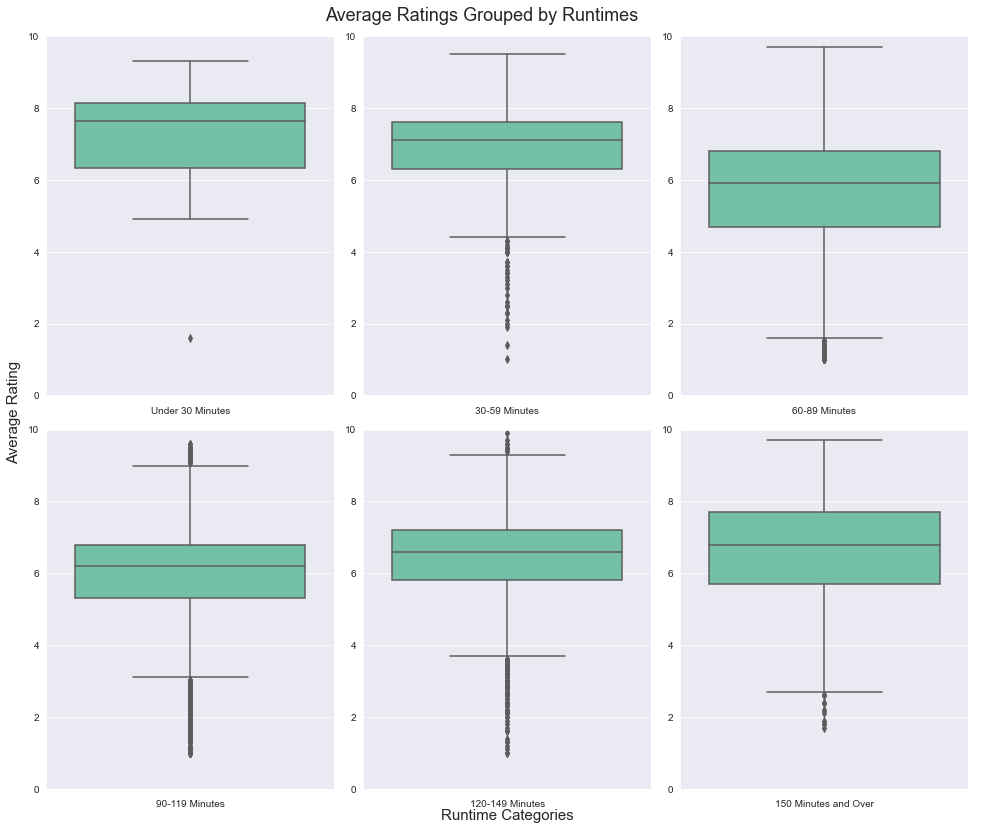

In [55]:
#https://stackoverflow.com/questions/64512227/common-x-label-for-subplots
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14,12))

plot1 = sns.boxplot(x='under30', y='averagerating', data=cat1, 
                    ax=axes[0,0], color='mediumaquamarine')
plot1.set(xlabel='Under 30 Minutes', xticklabels=[], ylabel= None, ylim=(0,10))

plot2 = sns.boxplot(x='btw3060', y='averagerating', data=cat2, 
                    ax=axes[0,1], color='mediumaquamarine')
plot2.set(xlabel='30-59 Minutes', xticklabels=[], ylabel= None, ylim= (0,10))

plot3 = sns.boxplot(x='btw6090', y='averagerating', data=cat3, 
                    ax=axes[0,2], color='mediumaquamarine')
plot3.set(xlabel='60-89 Minutes', xticklabels=[], ylabel= None, ylim=(0,10))

plot4 = sns.boxplot(x='btw90120', y='averagerating', data=cat4, 
                    ax=axes[1,0], color='mediumaquamarine')
plot4.set(xlabel='90-119 Minutes', xticklabels=[], ylabel= None, ylim=(0,10))

plot5 = sns.boxplot(x='btw120150', y='averagerating', data=cat5, 
                    ax=axes[1,1], color='mediumaquamarine')
plot5.set(xlabel='120-149 Minutes', xticklabels=[], ylabel= None, ylim=(0,10))

plot6 = sns.boxplot(x='over150', y='averagerating', data=cat6, 
                    ax=axes[1,2], color='mediumaquamarine')
plot6.set(xlabel='150 Minutes and Over', xticklabels=[], ylabel= None, ylim=(0,10))

fig.suptitle('Average Ratings Grouped by Runtimes', size=18)
fig.add_subplot(111, frameon= False)
plt.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)
plt.grid(b= None)
plt.xlabel('Runtime Categories', size=15)
plt.ylabel('Average Rating', size=15)
plt.tight_layout()
plt.show()

### Highest Grossing Films

Horror, Mystery, and Thriller have the greatest average return on investment. On the other hand, Reality-TV, War, and Western movies had an overall loss. 

In [56]:
#creating a new dictionary with genre and respective average return on investment
roi_details = {}

for genre in unique_genres_list:
    roi_df = invested_genres.loc[invested_genres[genre] == 1]
    avg_roi = roi_df['roi'].mean()
    roi_details[genre] = {'avg_roi': avg_roi}
    
roi_details

{'Action': {'avg_roi': 3.424850113760192},
 'Adult': {'avg_roi': nan},
 'Adventure': {'avg_roi': 18.694805540853398},
 'Animation': {'avg_roi': 37.87024569730621},
 'Biography': {'avg_roi': 74.93108961274484},
 'Comedy': {'avg_roi': 67.11834339111454},
 'Crime': {'avg_roi': 10.668201817660771},
 'Documentary': {'avg_roi': 71.98731560347154},
 'Drama': {'avg_roi': 62.79285423669369},
 'Family': {'avg_roi': 34.539562809018015},
 'Fantasy': {'avg_roi': 40.45019069739144},
 'Game-Show': {'avg_roi': nan},
 'History': {'avg_roi': 19.67880254854953},
 'Horror': {'avg_roi': 349.32999778722797},
 'Music': {'avg_roi': 68.76366812074818},
 'Musical': {'avg_roi': -3.097612217698352},
 'Mystery': {'avg_roi': 374.2217374643095},
 'News': {'avg_roi': nan},
 'Reality-TV': {'avg_roi': -100.0},
 'Romance': {'avg_roi': 106.44443410369918},
 'Sci-Fi': {'avg_roi': 54.271823362884895},
 'Short': {'avg_roi': nan},
 'Sport': {'avg_roi': 40.515824376919035},
 'Talk-Show': {'avg_roi': nan},
 'Thriller': {'avg_r

In [57]:
#make the dictionary into a dataframe
genres_roi = pd.DataFrame(roi_details).T

In [58]:
genres_roi

,avg_roi
Action,3.424850
Adult,NaN
Adventure,18.694806
Animation,37.870246
Biography,74.931090
Comedy,67.118343
Crime,10.668202
Documentary,71.987316
Drama,62.792854
Family,34.539563


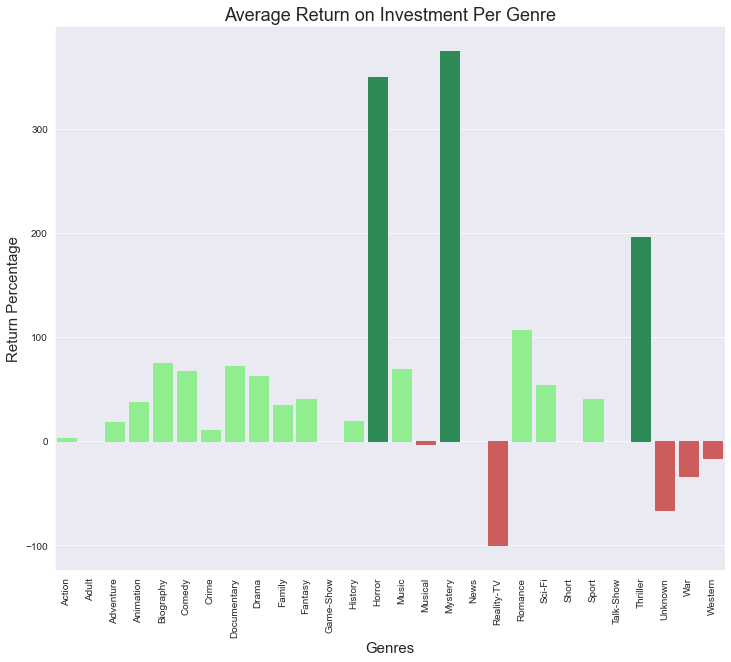

In [59]:
plt.figure(figsize=(12, 10))
sns.set_style('darkgrid')

plot = sns.barplot(x=genres_roi.index, y='avg_roi', data=genres_roi)

for bar in plot.patches:
    if bar.get_height() > 150:
        bar.set_color('seagreen')
    elif bar.get_height() < 0:
        bar.set_color('indianred')
    else:
        bar.set_color('lightgreen')

plt.setp(plot.get_xticklabels(), rotation=90)
plt.xlabel('Genres', size=15)
plt.ylabel('Return Percentage', size=15)
plt.title('Average Return on Investment Per Genre', size=18)
plt.show()

## Conclusions

This analysis leads to three recommendations for Microsoft to consider as they begin to develop films under their new movie studio:
- In terms of average rating, movies in News, Documentaries and Biography have higher ratings compared to others. While these genres may not currently have as many films as other genres, it is likely that overall ratings will be high for these genres, potentially bringing in continued viewership and support for Microsoft's movie studio. 
- When considering the average runtime, movies longer than 120 minutes will have an overall higher rating than movies shorter than 100 minutes. Movies that are either very short or very long received higher ratings possibly due to the nature of these genres. Microsoft should consider these runtimes when producing specific genres.
- Microsoft can leverage movies in genres such as Horror, Mystery and Thriller to make a greater return on the initial production budget. Reality-TV, War and Western movies should be reconsidered when deciding budget since these genres had an overall loss.

### Next Steps

Further analyses could lead to additional and more specific insights to produce movies that will perform best:
- Additional data on the demographics of the audience would be helpful to explore why certain genres are more popular when the number of movies vary greatly from genre to genre. This could help better predict ratings and the correlation to runtime as well.
- A better prediction of domestic versus worldwide gross and could predict the success of certain movies based on different markets. Additionally, differentiation between sales (e.g. box office sales vs. streaming sites) could predict what types of movies are more successful during its inital release or over a period of time.